In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

# import utils

DATA_FILE = 'fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [4]:
print(sheet.row_values(10))

[15.1, 25.0]


In [28]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = X * w + b

# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [29]:
# Phase 2: Train our model
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    # TO - DO	
    sess.run(tf.global_variables_initializer())

    # Step 8: train the model
    for i in range(100): # run 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss. Name the received value as l
            # TO DO: write sess.run()
            _, l = sess.run([optimizer, loss], feed_dict ={X:x, Y:y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    w, b = sess.run([w, b])

Epoch 0: 2069.632077968724
Epoch 1: 2117.0124027045676
Epoch 2: 2092.302715009167
Epoch 3: 2068.508299712269
Epoch 4: 2045.59097691377
Epoch 5: 2023.51466578529
Epoch 6: 2002.2447984701112
Epoch 7: 1981.7480356388148
Epoch 8: 1961.9942731161912
Epoch 9: 1942.9520601381857
Epoch 10: 1924.5930879137345
Epoch 11: 1906.8898473151382
Epoch 12: 1889.8164801984317
Epoch 13: 1873.347572792144
Epoch 14: 1857.4589788810838
Epoch 15: 1842.1277029727187
Epoch 16: 1827.3322633700002
Epoch 17: 1813.052086790048
Epoch 18: 1799.2660774976082
Epoch 19: 1785.9562136753016
Epoch 20: 1773.1024838801738
Epoch 21: 1760.6891868668124
Epoch 22: 1748.6984040662203
Epoch 23: 1737.1138700809595
Epoch 24: 1725.9208882119883
Epoch 25: 1715.1045996287653
Epoch 26: 1704.6503852187864
Epoch 27: 1694.5447281878164
Epoch 28: 1684.774640512564
Epoch 29: 1675.3281234368194
Epoch 30: 1666.1934701423827
Epoch 31: 1657.35837137096
Epoch 32: 1648.8119148027063
Epoch 33: 1640.5438601484611
Epoch 34: 1632.5446351634428
Epoch 3

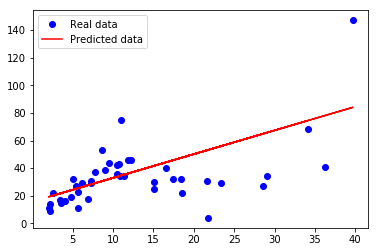

In [30]:
# plot the results
plotX, plotY = data.T[0], data.T[1]
plt.plot(plotX, plotY, 'bo', label='Real data')
plt.plot(plotX, plotX * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()